In [8]:
!pip install pandas_datareader
!pip install --upgrade pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [9]:
!pip install --upgrade pandas_datareader

In [19]:
import yfinance as yf

start = '2010-01-01'
end = '2020-12-31'
symbol = 'AAPL'

data = yf.download(symbol, start=start, end=end)
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [20]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.030807,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.025909,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.676407,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.883179,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.750168,96452100


In [21]:
#To set an original number index
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [22]:
#deleting the columns i don't needs
data=data.drop(['Date','Adj Close'], axis=1)
data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


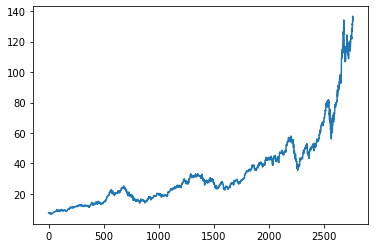

In [23]:
#graph showing the closing price of stock, if you want a graph for open use data.open
plt.plot(data.Close)

In [24]:
data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2763,132.160004,132.429993,130.779999,130.960007,88223700
2764,131.320007,133.460007,131.100006,131.970001,54930100
2765,133.990005,137.339996,133.509995,136.690002,124486200
2766,138.050003,138.789993,134.339996,134.869995,121047300


In [25]:
#MA=sum(CP)/ time period
ma100=data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

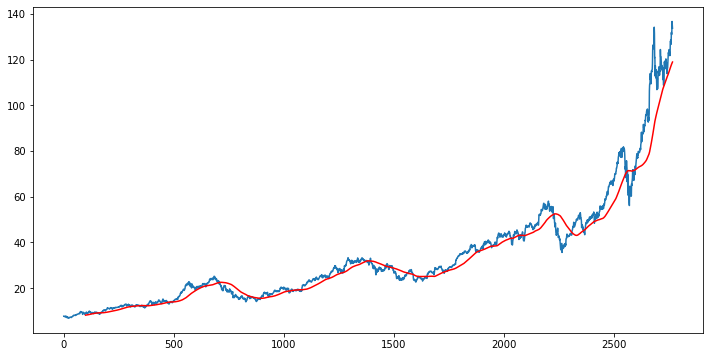

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [27]:
ma200=data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

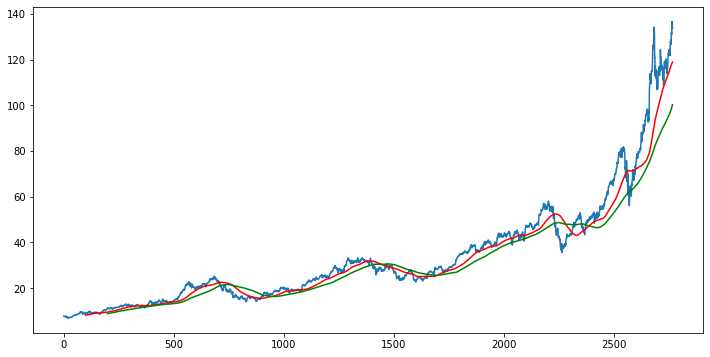

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [29]:
data.shape

(2768, 5)

In [30]:
#splitting data into training 70 and testing 30

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [31]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [32]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [34]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [35]:
data_training_array.shape

(1937, 1)

In [36]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train),np.array(y_train)

In [37]:
#ML Model

In [33]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:

# Assuming x_train and y_train are defined and have the appropriate dimensions

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=60, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60)               

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 62s 605ms/step - loss: 0.0507
Epoch 2/50
58/58 [==============================] - 30s 513ms/step - loss: 0.0128
Epoch 3/50
58/58 [==============================] - 28s 475ms/step - loss: 0.0118
Epoch 4/50
58/58 [==============================] - 26s 451ms/step - loss: 0.0113
Epoch 5/50
58/58 [==============================] - 26s 447ms/step - loss: 0.0102
Epoch 6/50
58/58 [==============================] - 26s 442ms/step - loss: 0.0091
Epoch 7/50
58/58 [==============================] - 26s 449ms/step - loss: 0.0093
Epoch 8/50
58/58 [==============================] - 26s 448ms/step - loss: 0.0081
Epoch 9/50
58/58 [==============================] - 26s 443ms/step - loss: 0.0088
Epoch 10/50
58/58 [==============================] - 26s 453ms/step - loss: 0.0082
Epoch 11/50
58/58 [==============================] - 26s 443ms/step - loss: 0.0070
Epoch 12/50
58/58 [==============================] - 27s 463ms/step - loss: 0.0065
Epoch 13/50
5

In [43]:
model.save('keras_model.h5')

In [44]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [45]:
past_100_days=data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [49]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [50]:
input_data.shape

(931, 1)

In [51]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [53]:
# making predictions

y_predicted=model.predict(x_test)

26/26 [==============================] - 6s 132ms/step


In [54]:
y_predicted.shape

(831, 1)

In [55]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [56]:
y_predicted

array([[0.1404176 ],
       [0.14068314],
       [0.14089718],
       [0.14105478],
       [0.14115706],
       [0.14120516],
       [0.14120018],
       [0.14113641],
       [0.14100432],
       [0.14079455],
       [0.14050388],
       [0.14014205],
       [0.13972434],
       [0.13926694],
       [0.13878778],
       [0.13830307],
       [0.13782737],
       [0.13737181],
       [0.13694909],
       [0.13656864],
       [0.1362378 ],
       [0.13596085],
       [0.13573983],
       [0.13557336],
       [0.13546288],
       [0.13541546],
       [0.13543567],
       [0.13551822],
       [0.13564506],
       [0.13579845],
       [0.13596275],
       [0.13612697],
       [0.136282  ],
       [0.1364302 ],
       [0.13659501],
       [0.13681221],
       [0.13711515],
       [0.13751873],
       [0.13803801],
       [0.13869551],
       [0.13950798],
       [0.1404829 ],
       [0.14161822],
       [0.14289436],
       [0.14427522],
       [0.14571038],
       [0.14713433],
       [0.148

In [57]:
scaler.scale_

array([0.00988704])

In [58]:
scale_factor=1/(0.00988704)
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

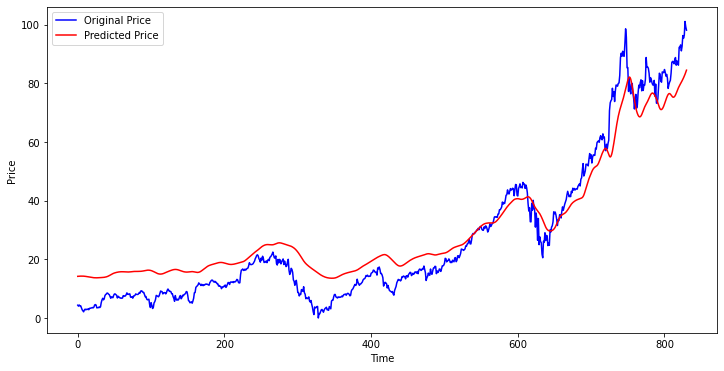

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()